# Steiner problem benchmark
In this jupyter notebook the mSTreg heuristic will be used to approximate the optimum Steiner tree.

In [15]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
if 'Benchmark_OR' in os.getcwd():
	os.chdir('../../..')
	sys.path.insert(0,os.getcwd())
print(os.getcwd())
print(sys.path[0])

/export/home/enfita/Code/CST_official_github_repo
/media/hdb/enfita/pycharm-professional-2021.3.3/plugins/python/helpers-pro/jupyter_debug


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from lib.CST.T_datacls import T_data
from Experiments.Benchmark_mSTreg.Benchmark_OR.load_ORdata import load_ORdata_instance

import pandas as pd

from tqdm import tqdm

parameter

In [18]:
save = False
maxiter_mSTreg=20
maxfreq_mSTreg=5

alpha_ls=np.linspace(0,1,11)
merging_criterium='tryall'
order_criterium='closest'
criterium_BP_position_update='median'

num_samples=[50,100]
num_problems = range(1, 16)

### Compute costs of the different algorithms

In [19]:
costs_mST=np.zeros((len(num_problems),len(num_samples)))
costs_mSTREG_alpha0=np.zeros((len(num_problems),len(num_samples)))
costs_NOmSTREG_alpha0=np.zeros((len(num_problems),len(num_samples)))

pbar = tqdm(total=len(num_samples)*len(num_problems), desc="Processing", ncols=100)
for column,n in enumerate(num_samples):
    for row,problem_number in enumerate(num_problems):
        pbar.update(1)
        P=load_ORdata_instance(n,problem_number)


        alpha=0
        tdata=T_data(P,verbose=False)
        tdata.compute_BCST(alpha=alpha, maxiter_mSTreg=maxiter_mSTreg,
                             maxfreq_mSTreg=maxfreq_mSTreg,return_topo_CST=False,init_topo='mST')


        costs_mSTREG_alpha0[row,column]=tdata.trees['BCST_%0.2f'%alpha].cost
        costs_mST[row,column]=tdata.trees['mST'].cost

        tdata.compute_BCST(alpha=alpha, maxiter_mSTreg=-1,
                           maxfreq_mSTreg=maxfreq_mSTreg, return_topo_CST=False, init_topo='mST')
        costs_NOmSTREG_alpha0[row, column] = tdata.trees['BCST_%0.2f' % alpha].cost

Processing: 100%|███████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.21it/s]

In [20]:

costs_steiner=[4.836601423,4.948404618,4.747169968,4.469074736,4.864825693,4.92345859,4.361318655,
               4.702746993,4.6760738,4.627790992,4.669385652,4.673221536,4.656471039,4.709868528,
               4.607990921,
               6.394256,6.594812128,6.531347066,6.576977411,6.674687782,6.466368368,6.987863494,
               6.394971137,6.914321113,6.719510819,6.832950895,6.670622612,6.505252521,
               6.882598532,6.205148881]


costsalpha0_df=pd.DataFrame(costs_steiner,
                      columns=['Optimum'],
                      index=['e%i.%i'%(n,problem_number) for n,problem_number in itertools.product(num_samples,num_problems)])

costsalpha0_df = costsalpha0_df.assign(mST=costs_mST.T.flatten())
costsalpha0_df = costsalpha0_df.assign(mSTreg=costs_mSTREG_alpha0.T.flatten())
costsalpha0_df = costsalpha0_df.assign(mST_fulltopo=costs_NOmSTREG_alpha0.T.flatten())



costsalpha0_df['GAP%_mST'] = costsalpha0_df.apply(lambda x: 100*(x['mST']/x['Optimum']-1) , axis=1)
costsalpha0_df['GAP%_mSTREG'] = costsalpha0_df.apply(lambda x: 100*(x['mSTreg']/x['Optimum']-1) , axis=1)
costsalpha0_df['GAP%_NOmSTREG'] = costsalpha0_df.apply(lambda x: 100*(x['mST_fulltopo']/x['Optimum']-1) , axis=1)




### Plot relative error with respect to optimum cost


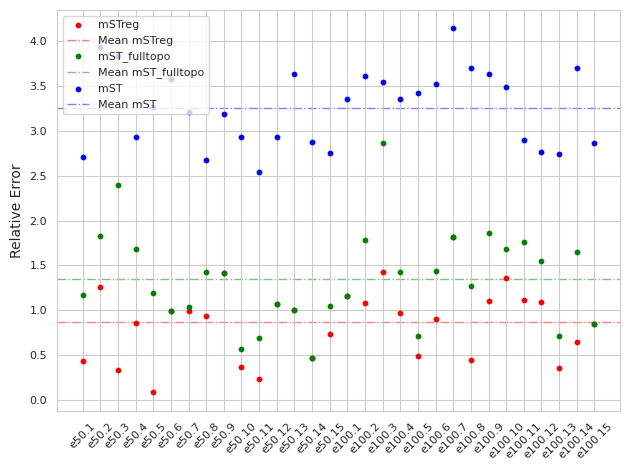

In [21]:
if save:
    folder='Figures/ORlibrary_Benchamark/'
    os.makedirs(folder,True)
s=10
fontsize=8
i=0
x=np.arange(0,len(costsalpha0_df))
c='rgb'
for i,label in enumerate(['mSTreg','mST_fulltopo','mST']):
    y=np.array(100*(costsalpha0_df[label]/costsalpha0_df['Optimum']-1))
    # y=np.concatenate([y,[np.mean(y)]])
    plt.scatter(x,y,s=s,label=label,c=c[i])
    plt.axhline(y=np.mean(y), c=c[i], linewidth=1,alpha=0.5,linestyle='-.', zorder=0,label='Mean %s'%label)

# plt.xlabel('Problem instance')
plt.ylabel('Relative Error')
plt.xticks(x,[problem_idx for problem_idx in costsalpha0_df.index],
           fontsize=fontsize,rotation=45, ha='center')
plt.yticks( fontsize=fontsize)
plt.legend(fontsize=fontsize,loc='upper left')
plt.grid('off');plt.tight_layout()
# plt.yscale('log')
if save:
    plt.savefig(folder+'Steiner_gap.png',dpi=200)
plt.show()